<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [1]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ast import literal_eval
from sklearn.preprocessing import label_binarize
import re

2023-05-31 16:35:36.536000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 16:35:38.505776: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-31 16:35:38.505921: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-31 16:35:38.505934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/solale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('archive/arxiv_data.csv', nrows=20000)
df = df.drop_duplicates(subset=['titles'])

In [4]:
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [5]:
df.describe()

,titles,summaries,terms
count,16593,16593,16593
unique,16593,16592,1406
top,Survey on Semantic Stereo Matching / Semantic ...,Transformer is a powerful tool for many natura...,['cs.CV']
freq,1,2,6655


In [6]:
df.groupby(['terms']).count()

,titles,summaries
terms,,
"['cs.CV', '03B52, 94A08', 'I.4.8; I.4.10']",1,1
"['cs.CV', '05B45, 62H30, 54E05, 68T10']",1,1
"['cs.CV', '14J60', 'F.2.2']",1,1
"['cs.CV', '26A33']",1,1
"['cs.CV', '49-06 (Primary), 49-11(Secondary)', 'I.4.6; I.5.1']",1,1
...,...,...
"['stat.ML', 'math.ST', 'stat.TH']",1,1
"['stat.ML', 'physics.comp-ph', 'physics.data-an', 'physics.geo-ph']",1,1
"['stat.ML', 'physics.comp-ph', 'physics.geo-ph']",1,1


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [7]:
df = df[~df["titles"].duplicated()]
df = df.groupby("terms").filter(lambda x: len(x) > 1)
df.shape

(15574, 3)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [8]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=None, lower_case=True,
                    punctuation_removal=True, number_removal=True):
    text = re.sub(r'/', ' ', text)
    if stopwords_domain is None:
        stopwords_domain = ['i.e', 'e.g', 'w.r.t']
    if number_removal:
        text = re.sub(r'\d+', '', text)
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [9]:
df['titles'] = df['titles'].apply(preprocess_text)
df['summaries'] = df['summaries'].apply(preprocess_text)
# title_dist = nltk.FreqDist(df.titles.sum())
# stop_words = title_dist.most_common(30)
# print(stop_words)
# df['titles'] = df['titles'].apply(lambda x: [t for t in x if t not in stop_words])

NameError: name 'df' is not defined

In [34]:
df.head()

,titles,summaries,terms
0,"[survey, semantic, stereo, matching, semantic,...","[stereo, matching, one, widely, used, techniqu...","['cs.CV', 'cs.LG']"
1,"[future-ai, guiding, principles, consensus, re...","[recent, advancements, artificial, intelligenc...","['cs.CV', 'cs.AI', 'cs.LG']"
2,"[enforcing, mutual, consistency, hard, regions...","[paper, proposed, novel, mutual, consistency, ...","['cs.CV', 'cs.AI']"
3,"[parameter, decoupling, strategy, semi-supervi...","[consistency, training, proven, advanced, semi...",['cs.CV']
4,"[background-foreground, segmentation, interior...","[ensure, safety, automated, driving, correct, ...","['cs.CV', 'cs.LG']"


In [35]:
df['terms'] = df['terms'].apply(lambda x: literal_eval(x)[0])

In [36]:
df.terms

0        cs.CV
1        cs.CV
2        cs.CV
3        cs.CV
4        cs.CV
         ...  
19993    cs.LG
19995    cs.CV
19996    cs.CV
19997    cs.LG
19999    cs.LG
Name: terms, Length: 15574, dtype: object

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [37]:
test_split = 0.3
train_df, test_df = train_test_split(
    df,
    test_size=test_split,
    stratify=df["terms"].values,
)

print(f'Train dataset size -> {train_df.shape}')
print(f'Test dataset size -> {test_df.shape}')

Train dataset size -> (10901, 3)
Test dataset size -> (4673, 3)


In [38]:
from sklearn.feature_extraction.text import CountVectorizer


def dummy(doc):
    return doc


def get_doc_word_matrix(df, cv: CountVectorizer = None):
    corpus = [[t for t in paper['titles'] for _ in (0, 1)] + paper['summaries'] for index, paper in df.iterrows()]
    if not cv:
        vectorizer = CountVectorizer(
            tokenizer=dummy,
            preprocessor=dummy,
        )
        X = vectorizer.fit_transform(corpus)
        return X.toarray(), vectorizer
    else:
        X = cv.transform(corpus)
        return X.toarray()

In [39]:
doc_word_matrix, cv = get_doc_word_matrix(train_df)

/home/solale/PycharmProjects/MIR_P2/venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
test_matrix = get_doc_word_matrix(test_df, cv)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [41]:
doc_word_matrix.shape

(10901, 41839)

In [53]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [54]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        self.cond_prob = []

    def fit(self, x, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''
        counter = Counter(y)
        self.prior = {k: v / len(y) for k, v in counter.items()}
        self.cond_prob = [[] for _ in self.prior.keys()]
        print(self.prior)
        for i, c in enumerate(self.prior.keys()):
            print(c)
            m = x[y == c]
            total = np.concatenate(m).sum()
            self.cond_prob[i] = (m.sum(axis=0) + 1) / (total + len(m[0]))

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        scores = []
        for i, c in enumerate(self.prior.keys()):
            scores.append(np.log(self.prior[c]))
            for j, t in enumerate(x):
                for k in range(t):
                    scores[i] += np.log(self.cond_prob[i][j])
        return list(self.prior.keys())[np.argmax(np.array(scores))], softmax(np.array(scores))

In [55]:
# use your classifier to fit on the training data
# then try to predict classes of test data

naive_bayes_classifier = NaiveBayes()
naive_bayes_classifier.fit(doc_word_matrix, train_df.terms)

{'cs.CV': 0.6703054765617833, 'cs.LG': 0.28978992752958443, 'stat.ML': 0.03990459590863223}
cs.CV
cs.LG
stat.ML


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

results = [naive_bayes_classifier.predict(x) for x in test_matrix]
y_pred, y_prob = [x[0] for x in results], [x[1] for x in results]
y_true = test_df.terms
precision, recall, f_score, sup = precision_recall_fscore_support(y_true, y_pred, average='macro')
precision_micro, recall_micro, f_score_micro, sup_micro = precision_recall_fscore_support(y_true, y_pred,
                                                                                          average='micro')
accuracy = accuracy_score(y_true, y_pred)
print(f'MACRO precision: {precision}, recall: {recall}, f_score: {f_score}')
print(f'MICRO precision: {precision_micro}, recall: {recall_micro}, f_score: {f_score_micro}')
print(f'accuracy: {accuracy}')

MACRO precision: 0.8893084067056813, recall: 0.603908464241486, f_score: 0.5847982939237132
MICRO precision: 0.8662529424352664, recall: 0.8662529424352664, f_score: 0.8662529424352664
accuracy: 0.8662529424352664


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

In [66]:
from itertools import cycle
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

classes = ['cs.CV', 'cs.LG', 'stat.ML']
n_classes = len(classes)
y = label_binarize(y_true, classes=classes)
y_p = label_binarize(y_pred, classes=classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.90
Macro-averaged One-vs-Rest ROC AUC score:
0.76


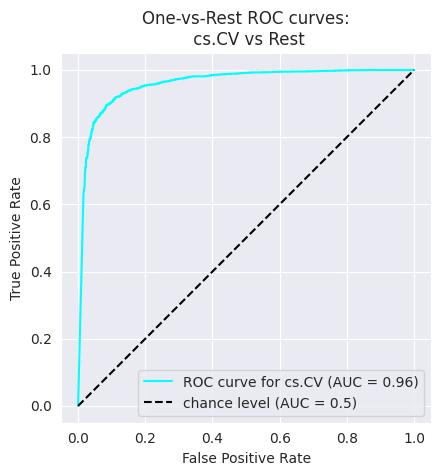

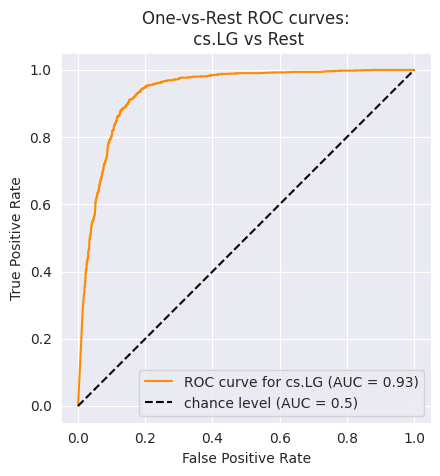

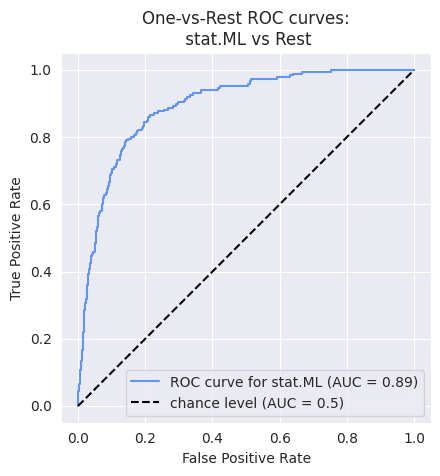

In [68]:
from sklearn.metrics import RocCurveDisplay

y_prob = np.stack(y_prob, axis=0)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y[:, class_id],
        y_prob[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        color=color,
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"One-vs-Rest ROC curves:\n {classes[class_id]} vs Rest")
    plt.legend()
    plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


def create_confusion_matrix(actual_labels, predicted_labels, num_classes):
    # Initialize an empty confusion matrix
    actual_labels = pd.Series(actual_labels).astype('category').cat.codes.values
    predicted_labels = pd.Series(predicted_labels).astype('category').cat.codes.values

    cm = np.zeros((num_classes, num_classes), dtype=int)

    # Iterate over each pair of actual and predicted labels
    for actual, predicted in zip(actual_labels, predicted_labels):
        cm[actual][predicted] += 1

    return cm


confusion_m = create_confusion_matrix(actual_labels=y_true, predicted_labels=y_pred, num_classes=n_classes)

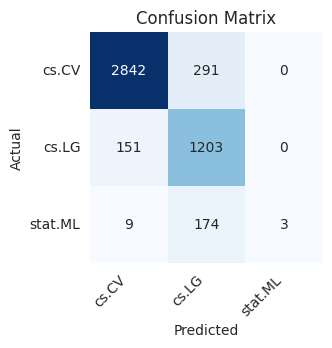

In [70]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(len(labels), len(labels)))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


plot_confusion_matrix(confusion_m, labels=classes)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [2]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [4]:
# read data
ml_df = pd.read_csv('archive/arxiv_data.csv', nrows=20000)

In [11]:
ml_df['titles'] = ml_df['titles'].apply(preprocess_text)
ml_df['summaries'] = ml_df['summaries'].apply(preprocess_text)
ml_df['terms'] = ml_df['terms'].apply(lambda x: literal_eval(x)[0])


In [12]:
# def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
#                     punctuation_removal=True):
#     """
#     preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
#     for stopwords use nltk.corpus.stopwords.words('english')
#     for punctuations use string.punctuation
#
#     Parameters
#     ----------
#     text: str
#         text to be preprocessed
#     minimum_length: int
#         minimum length of the token
#     stopword_removal: bool
#         whether to remove stopwords
#     stopwords_domain: list
#         list of stopwords to be removed base on domain
#     lower_case: bool
#         whether to convert to lowercase
#     punctuation_removal: bool
#         whether to remove punctuations
#     """
#     # todo
#     normalized_tokens = None
#     return normalized_tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [13]:
# preprocess text
# df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
# df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
# preprocessed_total = df['preprocessed_abstract'] + df['preprocessed_title']

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [14]:
ml_df.head()

,titles,summaries,terms
0,"[survey, semantic, stereo, matching, semantic,...","[stereo, matching, one, widely, used, techniqu...",cs.CV
1,"[future-ai, guiding, principles, consensus, re...","[recent, advancements, artificial, intelligenc...",cs.CV
2,"[enforcing, mutual, consistency, hard, regions...","[paper, proposed, novel, mutual, consistency, ...",cs.CV
3,"[parameter, decoupling, strategy, semi-supervi...","[consistency, training, proven, advanced, semi...",cs.CV
4,"[background-foreground, segmentation, interior...","[ensure, safety, automated, driving, correct, ...",cs.CV


In [15]:
class FastTextEmbedding:

    def __init__(self, method='skipgram', preprocess=None):
        self.method = method
        self.model = None
        self.preprocess = preprocess

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        with open('data/archive_ft.txt', 'w') as f:
            for t, s, l in zip(texts.titles, texts.summaries, texts.terms):
                f.write(' '.join(t) + ' ' + ' '.join(s))
                f.write('\n')
        self.model = fasttext.train_unsupervised(input='data/archive_ft.txt')

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        query = self.preprocess(query)
        tfidf_wm = tf_idf_vectorizer.transform([' '.join(query)])
        tf_idf_weight = tfidf_wm.toarray()[0]
        query_embed = np.zeros(100)
        tfidf_tokens = tf_idf_vectorizer.get_feature_names_out()
        for word in set(query):
            if tf_idf_weight[np.where(tfidf_tokens == word)]:
                query_embed += tf_idf_weight[np.where(tfidf_tokens == word)] * self.model.get_word_vector(word)
            else:
                print(word)
        return query_embed

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)

    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [36]:
FastText_model = FastTextEmbedding(preprocess=preprocess_text)
# FastText_model.prepare(ml_df, mode='train', save=True)
FastText_model.prepare(ml_df, mode='load')

In [37]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.8933971524238586, 'covid-'),
 (0.7553080916404724, 'covid-related'),
 (0.7115972638130188, 'pneumonia'),
 (0.701467752456665, 'pandemic'),
 (0.6956272721290588, 'x-rays'),
 (0.6889908909797668, 'in-hospital'),
 (0.6877138018608093, 'coronavirus'),
 (0.6843649744987488, 'chest'),
 (0.6828356385231018, 'infectious'),
 (0.6816428303718567, 'sars-cov-')]

In [42]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer(preprocessor=None, token_pattern=r"(?u)\b\w[\w-]*\w\b")

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit(data)


In [43]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(
    [' '.join(x) for x in ml_df.summaries.tolist()] + [' '.join(x) for x in ml_df.titles.tolist()])

In [40]:
text = "backpropagation is good"
print(TF_IDF_model.vectorizer.transform([text]).toarray())
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

[[0. 0. 0. ... 0. 0. 0.]]


array([-0.17091235,  0.04042738,  0.20155786,  0.03743515,  0.029743  ,
        0.19611592, -0.30425992,  0.27421203,  0.14435722, -0.46059099,
       -0.10559109, -0.17461121, -0.13065   , -0.03024681, -0.35759398,
        0.29015171,  0.11988357,  0.53886643, -0.18766271,  0.23943815,
        0.05389296, -0.03416122, -0.4675491 ,  0.02004068, -0.31239698,
       -0.03084216,  0.11303963,  0.19515509, -0.11726048, -0.08433428,
       -0.80410571,  0.11626839,  1.01637316,  0.58161557, -0.2377042 ,
        0.23700955,  0.41189621, -0.21681714, -0.18355347,  0.33626323,
        0.41007673,  0.17842116, -0.60741715, -0.13350822, -0.07631228,
        0.20045113,  0.45102633, -0.24831891, -0.28086559,  0.16941677,
       -0.203565  , -0.3105482 , -0.72830027,  0.65990743,  0.16562685,
       -0.222817  ,  0.388614  ,  0.0719212 , -0.0408782 ,  0.35329446,
       -0.02444552, -0.17257932, -0.14529217,  0.18472669,  0.18287534,
        0.10307406, -0.10486721,  0.17931605,  0.18745177, -0.03


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [41]:
ml_df['embedding'] = ml_df.apply(
    lambda x: FastText_model.get_query_embedding(' '.join(x['summaries'] + x['titles']), TF_IDF_model.vectorizer),
    axis=1)
embeddings = []

/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:


's


/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:
/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:
/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:


mc-net+
's
github.com


/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:
/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:


e.g.\
pre-


/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:


github.com


/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:


's


KeyboardInterrupt: 

In [17]:
s_df = pd.read_csv('ml_df.csv')
ml_df['embedding'] = s_df['embedding']

In [18]:
# ml_df.to_csv('ml_df.csv')

In [19]:
ml_df['embedding'] = ml_df['embedding'].apply(lambda x: [float(t) for t in x.replace('[', '').replace(']', '').split()])

In [20]:
ml_df.groupby(by=["terms"]).count()

,titles,summaries,embedding
terms,,,
cs.CV,13601,13601,13601
cs.LG,5609,5609,5609
stat.ML,790,790,790


In [21]:
ml_df['term_num'] = ml_df['terms'].map({'cs.CV': 0, 'cs.LG': 1, 'stat.ML': 2})

In [22]:
ml_df.head()

,titles,summaries,terms,embedding,term_num
0,"[survey, semantic, stereo, matching, semantic,...","[stereo, matching, one, widely, used, techniqu...",cs.CV,"[0.05331266, 0.61133364, -1.34678432, -0.15660...",0
1,"[future-ai, guiding, principles, consensus, re...","[recent, advancements, artificial, intelligenc...",cs.CV,"[1.27792983, 0.475542382, -1.01725404, -0.0456...",0
2,"[enforcing, mutual, consistency, hard, regions...","[paper, proposed, novel, mutual, consistency, ...",cs.CV,"[-0.06707639, 0.40710013, -0.80899814, -0.2688...",0
3,"[parameter, decoupling, strategy, semi-supervi...","[consistency, training, proven, advanced, semi...",cs.CV,"[0.05330299, 0.01468058, -0.18366176, -0.50907...",0
4,"[background-foreground, segmentation, interior...","[ensure, safety, automated, driving, correct, ...",cs.CV,"[0.32095881, 1.33557301, -1.27332349, 0.123458...",0


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [23]:
val_frac = 0.1
test_frac = 0.1
val_split_idx = int(len(ml_df) * (val_frac))
data_idx = list(range(len(ml_df)))
np.random.shuffle(data_idx)

val_idx, test_idx, train_idx = data_idx[:val_split_idx], data_idx[val_split_idx: val_split_idx * 2], data_idx[
                                                                                                     val_split_idx * 2:]
print('len of train: ', len(train_idx))
print('len of val: ', len(val_idx))
print('len of test: ', len(test_idx))

train = ml_df.iloc[train_idx].reset_index().drop('index', axis=1)
val = ml_df.iloc[val_idx].reset_index().drop('index', axis=1)
test = ml_df.iloc[test_idx].reset_index().drop('index', axis=1)

len of train:  16000
len of val:  2000
len of test:  2000


In [24]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = np.array(embeddings)
        self.labels = label_binarize(np.array(labels), classes=[0, 1, 2])

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, i):
        # embedding = self.embeddings[i]
        embedding = self.embeddings[i]
        target_label = self.labels[i]
        return torch.tensor(embedding, dtype=torch.float32), torch.tensor(target_label, dtype=torch.float32)

In [25]:
from collections import Counter

count = Counter(ml_df.term_num)
print(count)
class_count = np.array([count[0], count[1], count[2]])
weight = 1. / class_count
print(weight)

Counter({0: 13601, 1: 5609, 2: 790})
[7.35240056e-05 1.78284899e-04 1.26582278e-03]


In [26]:
from torch.utils.data import WeightedRandomSampler

samples_weight = np.array([weight[t] for t in ml_df.term_num])
samples_weight = torch.from_numpy(samples_weight)
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

In [29]:
train_ds = PapersDataSet(embeddings=train.embedding, labels=train.term_num)
val_ds = PapersDataSet(embeddings=val.embedding, labels=val.term_num)
test_ds = PapersDataSet(embeddings=test.embedding, labels=test.term_num)
train_loader = DataLoader(train_ds, batch_size=16, num_workers=0, shuffle=False)
val_loader = DataLoader(val_ds, batch_size=16, num_workers=0, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16, num_workers=0, shuffle=False)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [30]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super(ClassifierModel, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(64, num_classes),
        )
        self.softmax = nn.Softmax(dim=0)

    def forward(self, x):
        x = self.seq(x)
        return x

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [32]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    running_vloss = 0.0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for v_data in dataloader:
            v_inputs, v_labels = v_data
            true_labels.extend(v_labels.detach().numpy())
            v_outputs = model(v_inputs)
            predicted_labels.extend(v_outputs.detach().numpy())
            v_loss = criterion(v_outputs, v_labels)
            running_vloss += v_loss.item()

    eval_loss = running_vloss / len(dataloader)
    y = np.argmax(true_labels, axis=1)
    y_p = np.argmax(predicted_labels, axis=1)
    f1_score_macro = f1_score(y, y_p, average='macro')
    if test_mode:
        print('Test')
    else:
        print('Validation')
    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [34]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
import warnings

warnings.filterwarnings('always')

num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores, val_f1_macro_scores = [], []
for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0
    pl = []
    tl = []

    model.train()

    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, labels) in pbar:
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            tl.extend(labels.detach().numpy())
            pl.extend(outputs.detach().numpy())

    model.eval()

    val_loss, predicted_labels, true_labels, val_f1_score_macro = eval_epoch(model, criterion, val_loader)

    train_loss /= len(train_loader)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    y = np.argmax(tl, axis=1)
    y_p = np.argmax(pl, axis=1)
    f1_score_macro = f1_score(y, y_p, average='macro')
    f1_macro_scores.append(f1_score_macro)
    val_f1_macro_scores.append(val_f1_score_macro)

    end_time = time()

    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
          f"Train Loss: {train_loss:.4f}\t"
          f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro} \t Val F1 score macro: {val_f1_score_macro}")

100%|██████████| 1000/1000 [00:01<00:00, 583.74it/s]


Validation
Epoch 1 finished in 1.79s
[Epoch 1]	Train Loss: 0.4659	Validation Loss: 0.3799	 F1 score macro: 0.5372406618293222 	 Val F1 score macro: 0.5622401266827293


100%|██████████| 1000/1000 [00:01<00:00, 633.48it/s]


Validation
Epoch 2 finished in 1.66s
[Epoch 2]	Train Loss: 0.4168	Validation Loss: 0.3669	 F1 score macro: 0.5505256925055227 	 Val F1 score macro: 0.568588648159877


100%|██████████| 1000/1000 [00:01<00:00, 619.68it/s]


Validation
Epoch 3 finished in 1.70s
[Epoch 3]	Train Loss: 0.3994	Validation Loss: 0.3611	 F1 score macro: 0.557380508471816 	 Val F1 score macro: 0.5655557852579693


100%|██████████| 1000/1000 [00:01<00:00, 642.68it/s]


Validation
Epoch 4 finished in 1.64s
[Epoch 4]	Train Loss: 0.3951	Validation Loss: 0.3535	 F1 score macro: 0.5567948939235087 	 Val F1 score macro: 0.5717782011470975


100%|██████████| 1000/1000 [00:01<00:00, 531.32it/s]


Validation
Epoch 5 finished in 1.96s
[Epoch 5]	Train Loss: 0.3886	Validation Loss: 0.3535	 F1 score macro: 0.5616355582919428 	 Val F1 score macro: 0.5722783960605079


100%|██████████| 1000/1000 [00:01<00:00, 615.58it/s]


Validation
Epoch 6 finished in 1.72s
[Epoch 6]	Train Loss: 0.3861	Validation Loss: 0.3482	 F1 score macro: 0.5605100539466702 	 Val F1 score macro: 0.5710138885112374


100%|██████████| 1000/1000 [00:01<00:00, 604.93it/s]


Validation
Epoch 7 finished in 1.74s
[Epoch 7]	Train Loss: 0.3771	Validation Loss: 0.3481	 F1 score macro: 0.5623638786194588 	 Val F1 score macro: 0.5747024401415028


100%|██████████| 1000/1000 [00:01<00:00, 598.32it/s]


Validation
Epoch 8 finished in 1.76s
[Epoch 8]	Train Loss: 0.3722	Validation Loss: 0.3444	 F1 score macro: 0.5616282277727821 	 Val F1 score macro: 0.5743937132432674


100%|██████████| 1000/1000 [00:01<00:00, 637.13it/s]


Validation
Epoch 9 finished in 1.65s
[Epoch 9]	Train Loss: 0.3688	Validation Loss: 0.3452	 F1 score macro: 0.5621544036212396 	 Val F1 score macro: 0.5746799275883879


100%|██████████| 1000/1000 [00:01<00:00, 634.47it/s]


Validation
Epoch 10 finished in 1.67s
[Epoch 10]	Train Loss: 0.3643	Validation Loss: 0.3460	 F1 score macro: 0.5637495439469884 	 Val F1 score macro: 0.5736308622840967


100%|██████████| 1000/1000 [00:01<00:00, 616.45it/s]


Validation
Epoch 11 finished in 1.72s
[Epoch 11]	Train Loss: 0.3603	Validation Loss: 0.3414	 F1 score macro: 0.5675629738853063 	 Val F1 score macro: 0.5736308622840967


100%|██████████| 1000/1000 [00:01<00:00, 608.74it/s]


Validation
Epoch 12 finished in 1.76s
[Epoch 12]	Train Loss: 0.3564	Validation Loss: 0.3370	 F1 score macro: 0.5697096030366021 	 Val F1 score macro: 0.5749893844435908


100%|██████████| 1000/1000 [00:01<00:00, 607.35it/s]


Validation
Epoch 13 finished in 1.74s
[Epoch 13]	Train Loss: 0.3547	Validation Loss: 0.3418	 F1 score macro: 0.5686903158542002 	 Val F1 score macro: 0.5700218338750197


100%|██████████| 1000/1000 [00:01<00:00, 607.34it/s]


Validation
Epoch 14 finished in 1.74s
[Epoch 14]	Train Loss: 0.3518	Validation Loss: 0.3405	 F1 score macro: 0.5849598596172194 	 Val F1 score macro: 0.5721458695711155


100%|██████████| 1000/1000 [00:01<00:00, 651.51it/s]


Validation
Epoch 15 finished in 1.62s
[Epoch 15]	Train Loss: 0.3482	Validation Loss: 0.3402	 F1 score macro: 0.5780234625152793 	 Val F1 score macro: 0.5714128262580997


100%|██████████| 1000/1000 [00:01<00:00, 624.35it/s]


Validation
Epoch 16 finished in 1.69s
[Epoch 16]	Train Loss: 0.3424	Validation Loss: 0.3351	 F1 score macro: 0.5792879431978923 	 Val F1 score macro: 0.5716079667890597


100%|██████████| 1000/1000 [00:01<00:00, 585.30it/s]


Validation
Epoch 17 finished in 1.79s
[Epoch 17]	Train Loss: 0.3409	Validation Loss: 0.3383	 F1 score macro: 0.5857096761473398 	 Val F1 score macro: 0.5711790836916634


100%|██████████| 1000/1000 [00:01<00:00, 590.18it/s]


Validation
Epoch 18 finished in 1.80s
[Epoch 18]	Train Loss: 0.3351	Validation Loss: 0.3403	 F1 score macro: 0.586720275925828 	 Val F1 score macro: 0.5715273080487678


100%|██████████| 1000/1000 [00:01<00:00, 618.11it/s]


Validation
Epoch 19 finished in 1.72s
[Epoch 19]	Train Loss: 0.3300	Validation Loss: 0.3358	 F1 score macro: 0.5993045099508775 	 Val F1 score macro: 0.5721216940452408


100%|██████████| 1000/1000 [00:01<00:00, 596.32it/s]


Validation
Epoch 20 finished in 1.76s
[Epoch 20]	Train Loss: 0.3301	Validation Loss: 0.3359	 F1 score macro: 0.600496265286768 	 Val F1 score macro: 0.5729272590264414


100%|██████████| 1000/1000 [00:01<00:00, 640.44it/s]


Validation
Epoch 21 finished in 1.65s
[Epoch 21]	Train Loss: 0.3282	Validation Loss: 0.3342	 F1 score macro: 0.6127803315998702 	 Val F1 score macro: 0.5715142775567145


100%|██████████| 1000/1000 [00:01<00:00, 607.79it/s]


Validation
Epoch 22 finished in 1.73s
[Epoch 22]	Train Loss: 0.3250	Validation Loss: 0.3336	 F1 score macro: 0.6090177851463004 	 Val F1 score macro: 0.573051948051948


100%|██████████| 1000/1000 [00:01<00:00, 637.23it/s]


Validation
Epoch 23 finished in 1.65s
[Epoch 23]	Train Loss: 0.3250	Validation Loss: 0.3401	 F1 score macro: 0.5968837229009901 	 Val F1 score macro: 0.5700909739150825


100%|██████████| 1000/1000 [00:01<00:00, 607.69it/s]


Validation
Epoch 24 finished in 1.74s
[Epoch 24]	Train Loss: 0.3214	Validation Loss: 0.3335	 F1 score macro: 0.6098417405162777 	 Val F1 score macro: 0.572959587238207


100%|██████████| 1000/1000 [00:01<00:00, 649.54it/s]


Validation
Epoch 25 finished in 1.62s
[Epoch 25]	Train Loss: 0.3194	Validation Loss: 0.3355	 F1 score macro: 0.6139308633678955 	 Val F1 score macro: 0.5713119447234475


100%|██████████| 1000/1000 [00:01<00:00, 658.75it/s]


Validation
Epoch 26 finished in 1.61s
[Epoch 26]	Train Loss: 0.3171	Validation Loss: 0.3386	 F1 score macro: 0.6206547723371235 	 Val F1 score macro: 0.572512670519136


100%|██████████| 1000/1000 [00:01<00:00, 633.54it/s]


Validation
Epoch 27 finished in 1.67s
[Epoch 27]	Train Loss: 0.3172	Validation Loss: 0.3337	 F1 score macro: 0.6271878693189591 	 Val F1 score macro: 0.5714089834789907


100%|██████████| 1000/1000 [00:01<00:00, 584.12it/s]


Validation
Epoch 28 finished in 1.80s
[Epoch 28]	Train Loss: 0.3118	Validation Loss: 0.3365	 F1 score macro: 0.6339486594766096 	 Val F1 score macro: 0.5846723008519159


100%|██████████| 1000/1000 [00:01<00:00, 636.93it/s]


Validation
Epoch 29 finished in 1.67s
[Epoch 29]	Train Loss: 0.3086	Validation Loss: 0.3348	 F1 score macro: 0.6423013983350665 	 Val F1 score macro: 0.5701339939196036


100%|██████████| 1000/1000 [00:01<00:00, 659.07it/s]


Validation
Epoch 30 finished in 1.60s
[Epoch 30]	Train Loss: 0.3064	Validation Loss: 0.3355	 F1 score macro: 0.6356638543768748 	 Val F1 score macro: 0.5719321380028464


100%|██████████| 1000/1000 [00:01<00:00, 658.26it/s]


Validation
Epoch 31 finished in 1.61s
[Epoch 31]	Train Loss: 0.3032	Validation Loss: 0.3390	 F1 score macro: 0.6371293004834282 	 Val F1 score macro: 0.5714814461768635


100%|██████████| 1000/1000 [00:01<00:00, 643.36it/s]


Validation
Epoch 32 finished in 1.64s
[Epoch 32]	Train Loss: 0.3034	Validation Loss: 0.3309	 F1 score macro: 0.6508742385827871 	 Val F1 score macro: 0.5733317632658684


100%|██████████| 1000/1000 [00:01<00:00, 592.75it/s]


Validation
Epoch 33 finished in 1.79s
[Epoch 33]	Train Loss: 0.2994	Validation Loss: 0.3334	 F1 score macro: 0.6574171330256268 	 Val F1 score macro: 0.589907927299269


100%|██████████| 1000/1000 [00:01<00:00, 601.26it/s]


Validation
Epoch 34 finished in 1.75s
[Epoch 34]	Train Loss: 0.2977	Validation Loss: 0.3426	 F1 score macro: 0.6616057965765944 	 Val F1 score macro: 0.5703512958498713


100%|██████████| 1000/1000 [00:01<00:00, 581.41it/s]


Validation
Epoch 35 finished in 1.82s
[Epoch 35]	Train Loss: 0.3003	Validation Loss: 0.3392	 F1 score macro: 0.6423282887148353 	 Val F1 score macro: 0.5808106672498853


100%|██████████| 1000/1000 [00:01<00:00, 549.35it/s]


Validation
Epoch 36 finished in 1.93s
[Epoch 36]	Train Loss: 0.2933	Validation Loss: 0.3410	 F1 score macro: 0.661633653701135 	 Val F1 score macro: 0.5873748825515065


100%|██████████| 1000/1000 [00:01<00:00, 563.52it/s]


Validation
Epoch 37 finished in 1.89s
[Epoch 37]	Train Loss: 0.2929	Validation Loss: 0.3346	 F1 score macro: 0.6608808665299637 	 Val F1 score macro: 0.5729449639592642


100%|██████████| 1000/1000 [00:01<00:00, 531.58it/s]


Validation
Epoch 38 finished in 1.99s
[Epoch 38]	Train Loss: 0.2887	Validation Loss: 0.3415	 F1 score macro: 0.6645520112536564 	 Val F1 score macro: 0.5787089734019117


100%|██████████| 1000/1000 [00:01<00:00, 528.12it/s]


Validation
Epoch 39 finished in 2.00s
[Epoch 39]	Train Loss: 0.2890	Validation Loss: 0.3401	 F1 score macro: 0.6712816864748331 	 Val F1 score macro: 0.5846024345388847


100%|██████████| 1000/1000 [00:01<00:00, 537.01it/s]


Validation
Epoch 40 finished in 1.99s
[Epoch 40]	Train Loss: 0.2866	Validation Loss: 0.3397	 F1 score macro: 0.6672582709620447 	 Val F1 score macro: 0.5811234307776832


100%|██████████| 1000/1000 [00:01<00:00, 548.08it/s]


Validation
Epoch 41 finished in 1.94s
[Epoch 41]	Train Loss: 0.2814	Validation Loss: 0.3383	 F1 score macro: 0.6745984877493271 	 Val F1 score macro: 0.6169862596733585


100%|██████████| 1000/1000 [00:02<00:00, 495.06it/s]


Validation
Epoch 42 finished in 2.13s
[Epoch 42]	Train Loss: 0.2817	Validation Loss: 0.3477	 F1 score macro: 0.6737449385503034 	 Val F1 score macro: 0.5842760874824453


100%|██████████| 1000/1000 [00:01<00:00, 533.66it/s]


Validation
Epoch 43 finished in 1.97s
[Epoch 43]	Train Loss: 0.2799	Validation Loss: 0.3443	 F1 score macro: 0.6762907407901769 	 Val F1 score macro: 0.599361716427783


100%|██████████| 1000/1000 [00:01<00:00, 511.90it/s]


Validation
Epoch 44 finished in 2.08s
[Epoch 44]	Train Loss: 0.2843	Validation Loss: 0.3558	 F1 score macro: 0.6713410779184462 	 Val F1 score macro: 0.5983957605988347


100%|██████████| 1000/1000 [00:02<00:00, 497.01it/s]


Validation
Epoch 45 finished in 2.11s
[Epoch 45]	Train Loss: 0.2777	Validation Loss: 0.3543	 F1 score macro: 0.6806988486076438 	 Val F1 score macro: 0.6016265640686564


100%|██████████| 1000/1000 [00:01<00:00, 526.34it/s]


Validation
Epoch 46 finished in 2.00s
[Epoch 46]	Train Loss: 0.2769	Validation Loss: 0.3479	 F1 score macro: 0.6865532430583827 	 Val F1 score macro: 0.5833371709521186


100%|██████████| 1000/1000 [00:01<00:00, 508.92it/s]


Validation
Epoch 47 finished in 2.07s
[Epoch 47]	Train Loss: 0.2745	Validation Loss: 0.3522	 F1 score macro: 0.6911156256158177 	 Val F1 score macro: 0.5900852620451263


100%|██████████| 1000/1000 [00:01<00:00, 523.76it/s]


Validation
Epoch 48 finished in 2.02s
[Epoch 48]	Train Loss: 0.2764	Validation Loss: 0.3439	 F1 score macro: 0.6909341741966696 	 Val F1 score macro: 0.5975763056908606


100%|██████████| 1000/1000 [00:01<00:00, 565.58it/s]


Validation
Epoch 49 finished in 1.86s
[Epoch 49]	Train Loss: 0.2670	Validation Loss: 0.3578	 F1 score macro: 0.6927711222534133 	 Val F1 score macro: 0.6156718259403794


100%|██████████| 1000/1000 [00:01<00:00, 530.06it/s]


Validation
Epoch 50 finished in 1.99s
[Epoch 50]	Train Loss: 0.2692	Validation Loss: 0.3421	 F1 score macro: 0.7018290592039463 	 Val F1 score macro: 0.6338278209501907


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

In [255]:
def plot_model_history(model_name,
                       train_history, val_history,
                       num_epochs, metric):
    x = np.arange(num_epochs)

    fig = plt.figure(figsize=(10, 6))
    plt.plot(x, train_history, label=f'train {metric}', lw=3, c="springgreen")
    plt.plot(x, val_history, label=f'validation {metric}', lw=3, c="deeppink")

    plt.title(f"{model_name}", fontsize=15)
    plt.legend(fontsize=12)
    plt.xlabel("Epoch", fontsize=15)
    plt.ylabel(metric, fontsize=15)
    plt.show()

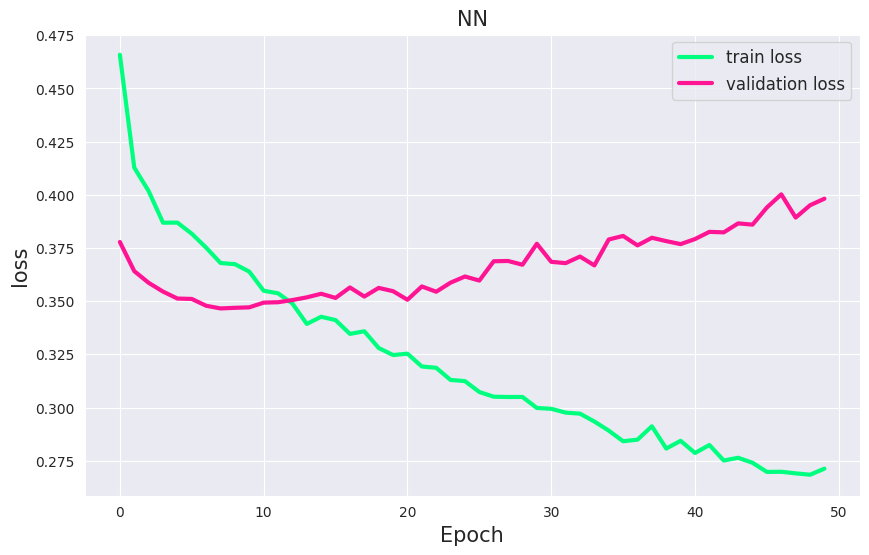

In [256]:
plot_model_history("NN", train_loss_arr, val_loss_arr, 50, metric='loss')

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

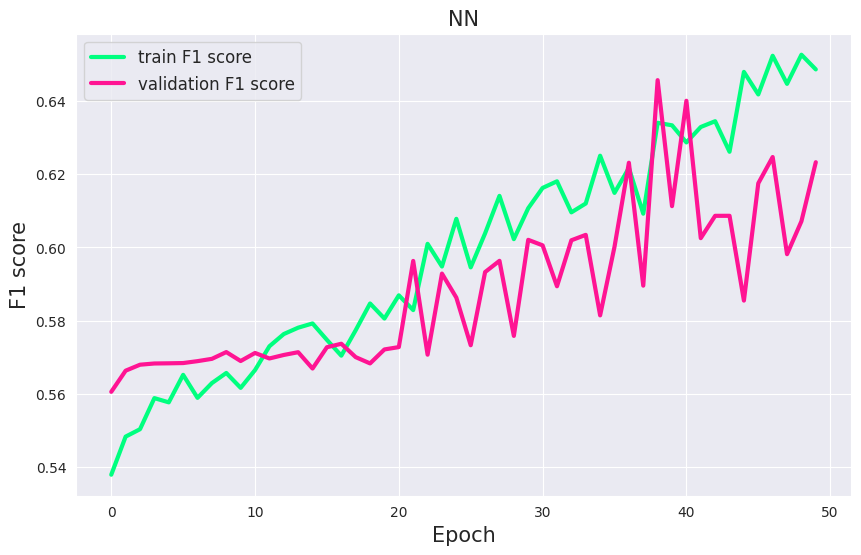

In [257]:
plot_model_history("NN", f1_macro_scores, val_f1_macro_scores, 50, metric='F1 score')

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

Test
Test Results:
Loss: 0.3932
Accuracy: 0.8515
F1 Score (Macro): 0.5938
F1 Score (Micro): 0.8515
Average Precision (Macro): 0.6561
Average Precision (Micro): 0.8515
Average Recall (Macro): 0.5959
Average Recall (Micro): 0.8515


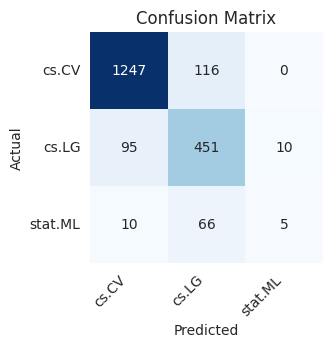

In [260]:
# print the required metrics
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)
true_labels = np.argmax(true_labels, axis=1)
predicted_labels = np.argmax(predicted_labels, axis=1)
accuracy = accuracy_score(true_labels, predicted_labels)
f1_score_micro = f1_score(true_labels, predicted_labels, average='micro')
confusion_m = confusion_matrix(true_labels, predicted_labels)
precision_micro = precision_score(true_labels, predicted_labels, average='micro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')

print("Test Results:")
print(f"Loss: {eval_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (Macro): {f1_score_macro:.4f}")
print(f"F1 Score (Micro): {f1_score_micro:.4f}")
print(f"Average Precision (Macro): {precision_macro:.4f}")
print(f"Average Precision (Micro): {precision_micro:.4f}")
print(f"Average Recall (Macro): {recall_macro:.4f}")
print(f"Average Recall (Micro): {recall_micro:.4f}")
plot_confusion_matrix(confusion_m, classes)

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [52]:
classes = ['cs.CV', 'cs.LG', 'stat.ML']


def predict(x, calsses):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    embedding = torch.Tensor(embedding).unsqueeze(0)
    predicted_class = model(embedding)
    class_num = torch.argmax(predicted_class)
    return classes[class_num]

In [53]:
predict('hardware and computerc architecture is good', calsses=classes)

computerc


/tmp/ipykernel_5489/2541764496.py:36: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if tf_idf_weight[np.where(tfidf_tokens == word)]:


'cs.CV'

In [54]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [20]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ast import literal_eval
import random

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [21]:
# read data
tr_df = pd.read_csv('./archive/arxiv_data.csv', nrows=100)
tr_df = tr_df.drop_duplicates(subset=['titles'])

In [22]:
# perform data cleaning and eda (you can add cells here)
# todo

In [23]:
def preprocess_text(text, minimum_length=1, lower_case=True,
                    punctuation_removal=True, number_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    text = re.sub(r'/', ' ', text)
    if number_removal:
        text = re.sub(r'\d+', '', text)
    normalized_tokens = word_tokenize(text)
    if punctuation_removal:
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]
    if lower_case:
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [24]:
# preprocess text
tr_df['preprocessed_abstract'] = tr_df['summaries'].apply(lambda x: preprocess_text(x))
tr_df['preprocessed_title'] = tr_df['titles'].apply(lambda x: preprocess_text(x))
tr_df.head()

,titles,summaries,terms,preprocessed_abstract,preprocessed_title
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']","[stereo, matching, is, one, of, the, widely, u...","[survey, on, semantic, stereo, matching, seman..."
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']","[the, recent, advancements, in, artificial, in...","[future-ai, guiding, principles, and, consensu..."
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']","[in, this, paper, we, proposed, novel, mutual,...","[enforcing, mutual, consistency, of, hard, reg..."
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV'],"[consistency, training, has, proven, to, be, a...","[parameter, decoupling, strategy, for, semi-su..."
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']","[to, ensure, safety, in, automated, driving, t...","[background-foreground, segmentation, for, int..."


In [25]:
tr_df['terms'] = tr_df['terms'].apply(lambda x: literal_eval(x)[0])
tr_df['term_num'] = tr_df['terms'].map({'cs.CV': 0, 'cs.LG': 1, 'stat.ML': 2})

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [26]:
# todo
# calculate labels
# calulcate final texts
# select 10000 data randomly
# split data into train and test

corpus = [' '.join(t) for t in tr_df['preprocessed_title'] + tr_df['preprocessed_abstract']]
classes = ['cs.CV', 'cs.LG', 'stat.ML']
Y = label_binarize(tr_df.terms, classes=classes)
X_train, X_test, y_train, y_test = train_test_split(corpus, tr_df.term_num.tolist(), test_size=0.2, random_state=1)

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [27]:
MODEL_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [28]:
# todo
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        self.attention_masks = []
        self.input_ids = []
        for text in self.texts:
            encoding = tokenizer.encode_plus(text,
                                             add_special_tokens=True,
                                             max_length=256,
                                             return_attention_mask=True,
                                             truncation=True,
                                             return_tensors='pt',
                                             padding='max_length')
            self.input_ids.append(encoding['input_ids'].squeeze())
            self.attention_masks.append(encoding['attention_mask'].squeeze())

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attention_masks[idx], self.labels[idx]

    def __len__(self):
        return len(self.labels)


train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [29]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [30]:
import copy


def train_model(the_model, train_dataloader, val_dataloader, model_optimizer, num_epochs=5):
    training_loss, train_accuracy, validation_loss, validation_accuracy = [], [], [], []
    best_result = (0.0, 0.0)
    best_net = None
    the_model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        pbar = tqdm(train_dataloader, desc=f'[epoch {epoch + 1}]')
        for input_ids, attention_masks, labels in pbar:
            input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)
            model_optimizer.zero_grad()
            outputs = the_model(input_ids=input_ids, attention_mask=attention_masks, labels=labels)
            loss = outputs.loss
            loss.backward()
            model_optimizer.step()
            p = outputs.logits.argmax(dim=1)
            correct += (p == labels).sum().item()
            running_loss += loss.item()
            pbar.set_postfix({'Loss': loss.item()})
        avg_loss = running_loss / len(train_dataloader)
        avg_accuracy = correct / len(train_dataloader)
        train_loss.append(avg_loss)
        train_accuracy.append(avg_accuracy)

        the_model.eval()

        with torch.no_grad():
            loss_val = 0.0
            correct_val = 0
            for input_ids, attention_masks, labels in val_dataloader:
                input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)
                outputs = the_model(input_ids=input_ids, attention_mask=attention_masks, labels=labels)
                loss = outputs.loss
                _, p = torch.max(outputs, 1)
                correct_val += (p == labels).sum().item()
                loss_val += loss.item()
            avg_loss_val = loss_val / len(val_dataloader)
            avg_accuracy_val = correct_val / len(val_dataloader)
            validation_loss.append(avg_loss_val)
            validation_accuracy.append(avg_accuracy_val)
        if (avg_accuracy_val, avg_loss_val) > best_result:
            best_result = (avg_accuracy_val, avg_loss_val)
            best_net = copy.deepcopy(the_model)
        the_model.train()
        #     scheduler.step(avg_loss_val)
        print('Train Loss: %.4f Train Accuracy: %.4f Validation Loss: %.4f Validation Accuracy: %.4f' % (
            avg_loss, avg_accuracy, avg_loss_val, avg_accuracy_val))

In [ ]:
from transformers import AdamW

m1_optimizer = AdamW(model.parameters(), lr=1e-2)
train_model(model, train_dataloader=train_loader, val_dataloader=test_loader, model_optimizer=m1_optimizer)

/home/solale/PycharmProjects/MIR_P2/venv/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
[epoch %d 1]:   0%|          | 0/5 [00:00<?, ?it/s]

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
# you can add more cells here if you need
# todo
y_pred_transformers = []
y_pred_transformers_2 = []

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
پاسخ خود را در این قسمت بنویسید
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    predicted_class = None
    return predicted_class

In [ ]:
predict('hardware is very good.', model)

In [ ]:
# It is highly recommended to save your final models
# todo

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /home/solale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/solale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/solale/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/solale/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
from phase1 import *
from ast import literal_eval

In [46]:

df = pd.read_csv('archive/arxiv_data.csv', nrows=100)
all_text = list(df[df['summaries'].notnull()]['summaries'])
all_text = list(map(clean_data, all_text))
stop_words = find_stop_words([' '.join(item) for item in all_text])
stop_words_list = [x[0] for x in stop_words]
df = df.fillna(-1)
df = df[~df["titles"].duplicated()]
df = df.groupby("terms").filter(lambda x: len(x) > 1)
df['terms'] = df['terms'].apply(lambda x: literal_eval(x)[0])
df.shape

(82, 3)

In [47]:
df.groupby(['terms']).count()

,titles,summaries
terms,,
cs.CV,82,82


In [48]:
doc_dict, paper_id_map = create_paper_id_map(df=df, stop_words_list=stop_words_list)
positional_index = construct_positional_indexes(paper_id_map=paper_id_map, doc_dict=doc_dict)

In [49]:
tf_doc = compute_tf(doc_dict)

In [50]:
idf_dict = compute_idf(positional_index, paper_id_map=paper_id_map)
okapi_idf = compute_idf_okapi(positional_index, paper_id_map=paper_id_map)

In [51]:
search(title_query="object detection", abstract_query="object dection", weight=0.5,
       stop_words_list=stop_words_list, paper_id_map=paper_id_map, tf_doc=tf_doc, idf_dict=idf_dict, method='okapi25',
       doc_dict=doc_dict, okapi_idf=okapi_idf, category='cs.CV', df=df, max_result_count=5)

|    | titles                                                                                           |
|---:|:-------------------------------------------------------------------------------------------------|
| 27 | Autonomous Removal of Perspective Distortion of Elevator Button Images based on Corner Detection |
| 34 | Deep Reinforcement Learning in Computer Vision: A Comprehensive Survey                           |
| 43 | Real-Time Multi-Modal Semantic Fusion on Unmanned Aerial Vehicles                                |
| 67 | Weighted Intersection over Union (wIoU): A New Evaluation Metric for Image Segmentation          |
| 88 | A Deep Learning Object Detection Method for an Efficient Clusters Initialization                 |


[73, 22, 54, 36, 29]

In [52]:
paper_id_map

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 11: 10,
 13: 11,
 14: 12,
 15: 13,
 16: 14,
 17: 15,
 18: 16,
 19: 17,
 20: 18,
 23: 19,
 25: 20,
 26: 21,
 27: 22,
 28: 23,
 29: 24,
 30: 25,
 31: 26,
 32: 27,
 33: 28,
 34: 29,
 35: 30,
 36: 31,
 37: 32,
 40: 33,
 41: 34,
 42: 35,
 43: 36,
 44: 37,
 45: 38,
 46: 39,
 47: 40,
 48: 41,
 49: 42,
 51: 43,
 52: 44,
 55: 45,
 56: 46,
 57: 47,
 59: 48,
 60: 49,
 61: 50,
 63: 51,
 65: 52,
 66: 53,
 67: 54,
 68: 55,
 69: 56,
 70: 57,
 71: 58,
 72: 59,
 73: 60,
 74: 61,
 76: 62,
 77: 63,
 78: 64,
 79: 65,
 80: 66,
 81: 67,
 83: 68,
 84: 69,
 85: 70,
 86: 71,
 87: 72,
 88: 73,
 89: 74,
 91: 75,
 92: 76,
 93: 77,
 94: 78,
 95: 79,
 96: 80,
 97: 81,
 98: 82}

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [ ]:
## ؟ points

from typing import List


def extract_embedding(doc_list: List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """

    # TODO: Extract a vector for each input document using a transformer-based language model 
    pass


docs_embedding = extract_embedding(
    [str, str, str, ...])  # return [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [ ]:
## ؟ points

from typing import List


def convert_to_2d_tsne(emb_vecs: List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    # TODO: Convert each input vector to 2d vector 
    pass


docs_embedding_2d = convert_to_2d_tsne([[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...],
                                        [NUM, NUM, NUM, ...]])  # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



In [ ]:
## ؟ points

from typing import List


def plot_docs(emb_vecs_2d: List, labels: List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """

    # TODO: Draw a 2d plot from input vectors and color each cluster with specific color.
    pass


plot_docs([[NUM, NUM], [NUM, NUM], [NUM, NUM], ...])

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [ ]:
## ؟ points

from typing import List


def cluster_kmeans(emb_vecs: List, n_clusters: int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    # TODO: Implement K-means method 
    pass


cluster_centers, cluster_kmeans = cluster_kmeans(
    [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]])  # return [NUM, NUM, NUM, ...]

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
#TODO: silhouette analysis 

In [ ]:
#TODO: plot purity for different value of k

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

#TODO

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [ ]:
## ؟ points

from typing import List


def find_similar_docs(input_doc_index: int,
                      num_of_similar_docs: int,
                      emb_vecs: List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    # TODO: Implement a function to find similar documents to input document.
    pass


find_similar_docs(int, int, [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]])